# The importance of handwashing: A data analysis approach

![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

## Introduction

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

## Dataset

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

## Analysis

In this section we will statistically analyze the datasets to quantify the importance of handwashing in giving birth.

### Importing data and loading packages

In [23]:
# Imported libraries
library(tidyverse, verbose = FALSE)

# Start coding here..
# Loading files
# yearly deaths
yearly <- read_csv("data/yearly_deaths_by_clinic.csv", show_col_types = FALSE)
# monthly deaths - clinic 1
monthly <- read_csv("data/monthly_deaths.csv", show_col_types = FALSE)
glimpse(yearly)
glimpse(monthly)

Rows: 12
Columns: 4
$ year   <dbl> 1841, 1842, 1843, 1844, 1845, 1846, 1841, 1842, 1843, 1844, 184…
$ births <dbl> 3036, 3287, 3060, 3157, 3492, 4010, 2442, 2659, 2739, 2956, 324…
$ deaths <dbl> 237, 518, 274, 260, 241, 459, 86, 202, 164, 68, 66, 105
$ clinic <chr> "clinic 1", "clinic 1", "clinic 1", "clinic 1", "clinic 1", "cl…
Rows: 98
Columns: 3
$ date   <date> 1841-01-01, 1841-02-01, 1841-03-01, 1841-04-01, 1841-05-01, 18…
$ births <dbl> 254, 239, 277, 255, 255, 200, 190, 222, 213, 236, 235, 307, 311…
$ deaths <dbl> 37, 18, 12, 4, 2, 10, 16, 3, 4, 26, 53, 64, 38, 27, 26, 10, 18,…


###  Proportion of deaths
Now, we'll calculate the proportion of deaths per number of births for each year and month, respectively.

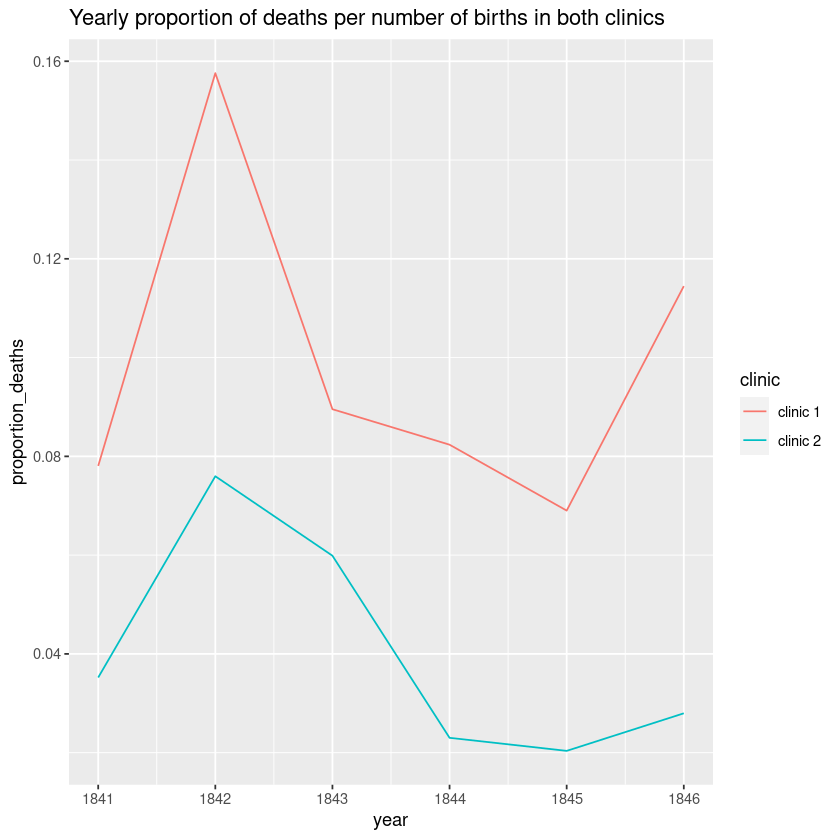

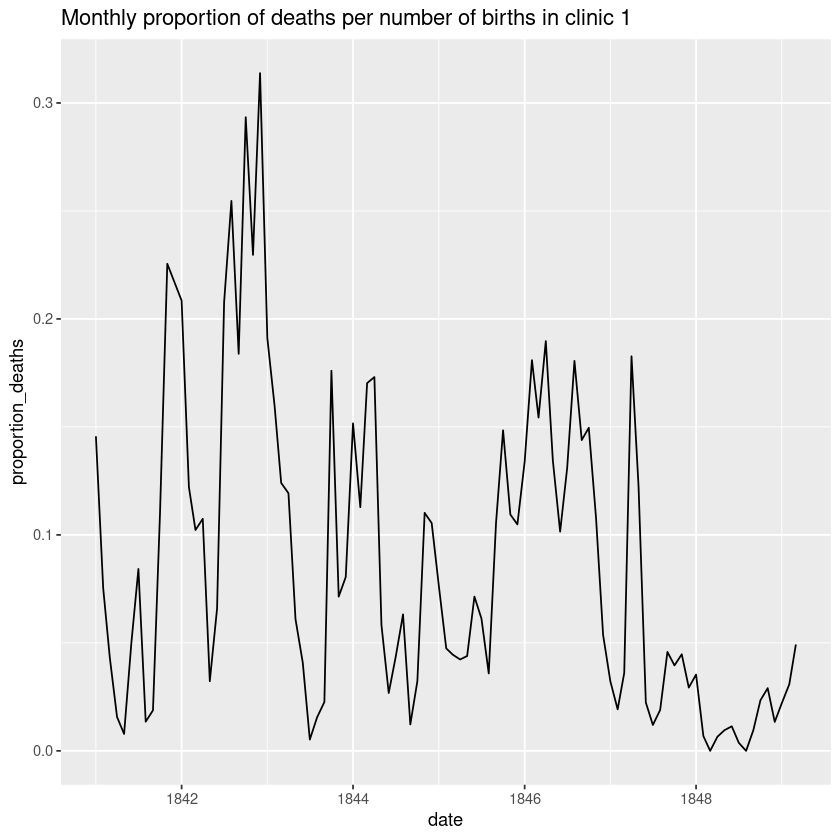

In [18]:
# Adding a proportion of deaths column to each dataset
yearly$proportion_deaths = yearly$deaths/yearly$births
monthly$proportion_deaths = monthly$deaths/monthly$births

# Line plots
# yearly
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) +
  geom_line() +
  ggtitle("Yearly proportion of deaths per number of births in both clinics")

# monthly
ggplot(monthly, aes(x = date, y = proportion_deaths)) +
  geom_line() +
  ggtitle("Monthly proportion of deaths per number of births in clinic 1")

Although the plots display decreasing trends, we can see a peak again around 1845-1846.
Now let's see what happens when we consider the actual handwashing practice date (June 1st 1847).

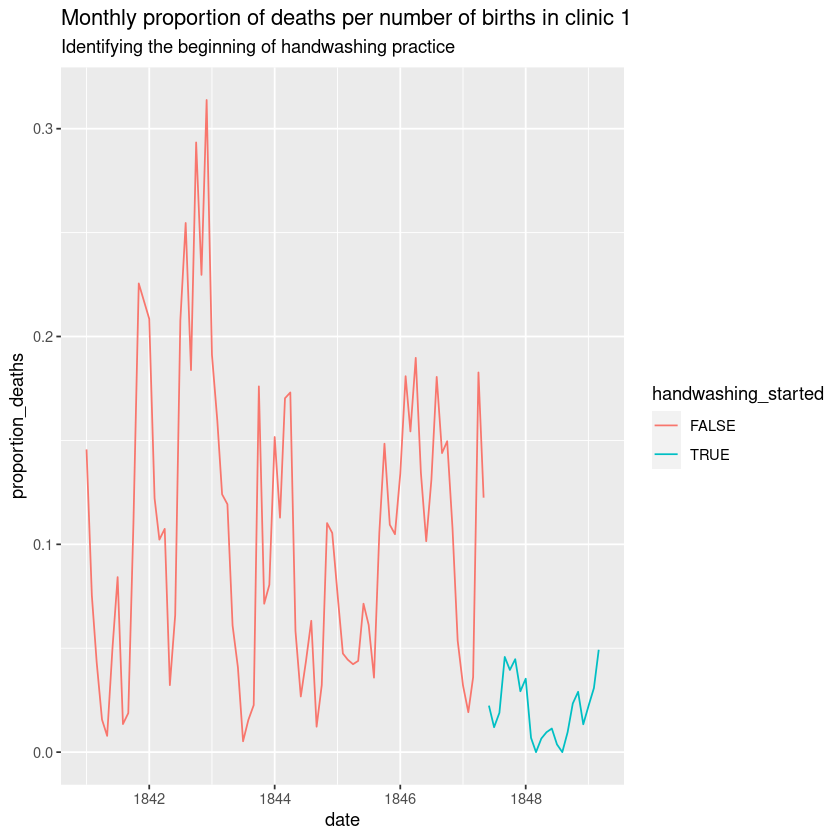

In [19]:
# Adding a boolean column identifying whether it is part of the handwashing practice or not
monthly = monthly %>%
    mutate(handwashing_started = ifelse(date >= '1847-06-01', TRUE, FALSE))

# Updating the monthly plot
ggplot(monthly, aes(x = date, y = proportion_deaths, color = handwashing_started)) +
  geom_line() +
  ggtitle(label = "Monthly proportion of deaths per number of births in clinic 1", subtitle = "Identifying the beginning of handwashing practice")

In [20]:
# calculating the mean proportion of deaths before and after handwashing
monthly_summary = monthly %>%
	group_by(handwashing_started) %>%
	summarise(mean_proportion_deaths = mean(proportion_deaths))

monthly_summary

handwashing_started mean_proportion_deaths
1 FALSE               0.10504998            
2  TRUE               0.02109338

Now, we can see that the handwashing practice significantly helped to decrease the rate of deaths/births, and it's evident visually and numerically.